Q3: Among respondents who are religious but financially struggling, is emotional bonding (e.g., respect and cuddling) still strong?

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Marital_satisfaction_Data.csv")

# Step 1: Display all column names for confirmation
print("📌 Column Names:\n", df.columns.tolist())

# Step 2: Filter respondents who are religious and financially struggling
religious_threshold = 5
struggling_values = [4, 5]  # Worse than average or much worse

filtered_df = df[(df["Religiosity"] >= religious_threshold) & (df["Material status"].isin(struggling_values))]

print(f"\n🧮 Total filtered respondents (Religious ≥ {religious_threshold} and Financially struggling): {len(filtered_df)}")

# Step 3: Use Unnamed:16 (Q15 - Cuddling) and Unnamed:17 (Q16 - Respect)
# Rename for clarity
bonding_df = filtered_df[["Unnamed: 16", "Unnamed: 17"]].copy()
bonding_df.columns = ["Q15_Cuddling", "Q16_Respect"]

# Drop any rows with missing values
bonding_df = bonding_df.dropna()

# Step 4: Convert to numeric in case of string types
bonding_df = bonding_df.astype(float)

# Step 5: Compute average bonding scores
avg_scores = bonding_df.mean()

print("\n❤️ Average Emotional Bonding Scores:")
print(avg_scores)

# Step 6: Interpret results
if (avg_scores > 0).all():  # > 0 on a -2 to +2 scale indicates strong bonding
    print("\n✅ Emotional bonding is still strong among religious and financially struggling respondents.")
else:
    print("\n⚠️ Emotional bonding appears weak or mixed.")


📌 Column Names:
 ['Country ', 'Sex', 'Age', 'Marriage_duration', 'Number_of_children', 'Num_brought_up_children', 'Education', 'Material status', 'Religion', 'Religiosity', 'Pension', 'MRQ', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'KMSS', 'Unnamed: 21', 'Unnamed: 22', 'GLOBE_survey', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']

🧮 Total filtered respondents (Religious ≥ 5 and Financially struggling): 211

❤️ Average Emotional Bonding Scores:
Q15_Cuddling    1.402844
Q16_Respect     1.616114
dtype: float64

✅ Emotional bonding is still strong among religious and financially struggling respondents.


Average Emotional Bonding Scores (Religious & Financially Struggling Respondents)

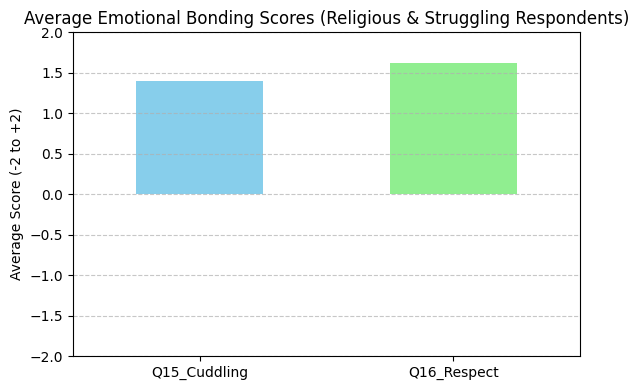

In [3]:
import matplotlib.pyplot as plt

# Bar chart of emotional bonding
plt.figure(figsize=(6, 4))
avg_scores.plot(kind="bar", color=["skyblue", "lightgreen"])
plt.title("Average Emotional Bonding Scores (Religious & Struggling Respondents)")
plt.ylabel("Average Score (-2 to +2)")
plt.xticks(rotation=0)
plt.ylim(-2, 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Score Distribution For Emotional Bonding

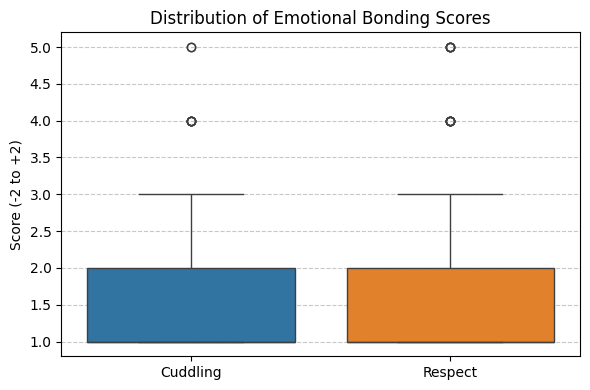

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=bonding_df)
plt.title("Distribution of Emotional Bonding Scores")
plt.ylabel("Score (-2 to +2)")
plt.xticks([0, 1], ['Cuddling', 'Respect'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Score Distribution

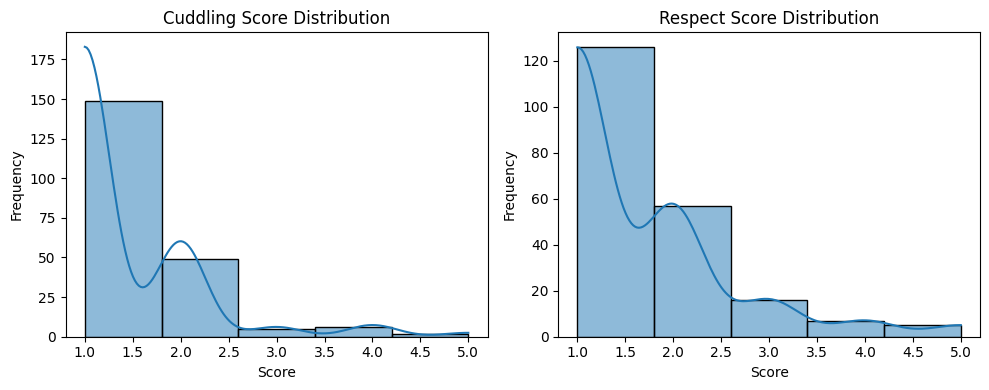

In [5]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(bonding_df["Q15_Cuddling"], kde=True, bins=5)
plt.title("Cuddling Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(bonding_df["Q16_Respect"], kde=True, bins=5)
plt.title("Respect Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
